In [1]:
#1.24-3.24
import pandas as pd
import time, datetime
df=pd.read_csv('nbiot20200927.csv')

In [2]:
df.head()

,idnbiot_backup,deviceid,dtime,temperature,humidity
0,1,001800383337363418473930,1577675980,10.95,24.54
1,2,002400373337363416473930,1577675971,8.77,26.94
2,3,002900393337363416473930,1577673586,9.29,11.33
3,4,001400263337363417473930,1577674113,8.08,31.10
4,5,004C00243337363416473930,1577674272,8.97,25.38


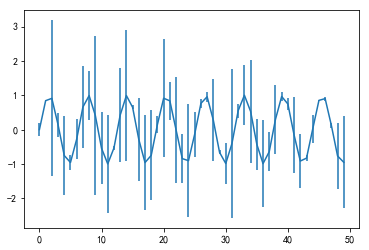

In [3]:
#-*- coding: utf-8 -*-
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
error = np.random.randn(50)    #定义误差列
# print(error)
y = pd.Series(np.sin(np.arange(50)))    #取序列值，用于绘制正弦曲线
# print(y)
y.plot(yerr=error)    #y轴方向绘制误差棒图
#plt.errorbar(x=[1, 2, 3, 4], y=[1, 2, 3, 4], yerr=1, fmt='co--')
plt.show()

In [4]:
#2020/1/24 9:47
def trans(timeStamp):
    timeArray = time.localtime(timeStamp)
    otherStyleTime = time.strftime("%Y/%m/%d %H:%M:%S", timeArray)
    return otherStyleTime

In [5]:
df['time']=df.apply(lambda x: trans(x['dtime']), axis=1)

In [6]:
df.head()

,idnbiot_backup,deviceid,dtime,temperature,humidity,time
0,1,001800383337363418473930,1577675980,10.95,24.54,2019/12/30 11:19:40
1,2,002400373337363416473930,1577675971,8.77,26.94,2019/12/30 11:19:31
2,3,002900393337363416473930,1577673586,9.29,11.33,2019/12/30 10:39:46
3,4,001400263337363417473930,1577674113,8.08,31.10,2019/12/30 10:48:33
4,5,004C00243337363416473930,1577674272,8.97,25.38,2019/12/30 10:51:12


In [7]:
df=df[df['dtime']<=1586877565]
df=df[df['dtime']>=1579018765]

In [8]:
df.head()

,idnbiot_backup,deviceid,dtime,temperature,humidity,time
3341,3360,002900393337363416473930,1579020353,7.54,11.65,2020/01/15 00:45:53
3344,3363,003F004C3337363416473930,1579020420,8.41,24.54,2020/01/15 00:47:00
3345,3364,002D00623337363416473930,1579020525,8.41,29.88,2020/01/15 00:48:45
3347,3366,003000593337363416473930,1579019919,7.27,27.45,2020/01/15 00:38:39
3348,3367,001800383337363418473930,1579021836,10.04,25.70,2020/01/15 01:10:36


In [9]:
df[df['humidity']==0]

,idnbiot_backup,deviceid,dtime,temperature,humidity,time


In [10]:
'2020/01/24 01:47:29'[0:10]

'2020/01/24'

In [11]:
df['day']=df.apply(lambda x:x['time'][0:10], axis=1)
df.head()
#完成了

,idnbiot_backup,deviceid,dtime,temperature,humidity,time,day
3341,3360,002900393337363416473930,1579020353,7.54,11.65,2020/01/15 00:45:53,2020/01/15
3344,3363,003F004C3337363416473930,1579020420,8.41,24.54,2020/01/15 00:47:00,2020/01/15
3345,3364,002D00623337363416473930,1579020525,8.41,29.88,2020/01/15 00:48:45,2020/01/15
3347,3366,003000593337363416473930,1579019919,7.27,27.45,2020/01/15 00:38:39,2020/01/15
3348,3367,001800383337363418473930,1579021836,10.04,25.70,2020/01/15 01:10:36,2020/01/15


In [12]:
tf=df.groupby('deviceid')

In [13]:
tf.mean().to_csv('传感器信息平均温度等.csv')

In [14]:
tf=df.groupby('day')

In [15]:
tempstd=df.groupby('day').std()['temperature']
humstd=df.groupby('day').std()['humidity']
temperature=df.groupby('day').mean()['temperature']
humidity=df.groupby('day').mean()['humidity']

In [16]:
x=df.groupby('day').mean().index

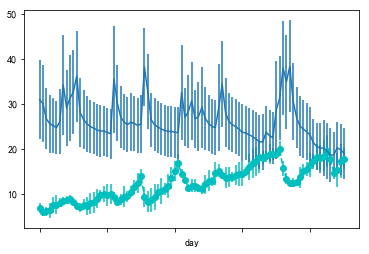

In [17]:
error = np.random.randn(50)    #定义误差列
# print(error)
y = pd.Series(temperature)    #取序列值，用于绘制正弦曲线
# print(y)
y.plot(yerr=tempstd, fmt='co--')    #y轴方向绘制误差棒图
#plt.errorbar(x=[1, 2, 3, 4], y=[1, 2, 3, 4], yerr=1, fmt='co--')
z = pd.Series(humidity)    #取序列值，用于绘制正弦曲线
# print(y)
z.plot(yerr=humstd)    #y轴方向绘制误差棒图
plt.show()

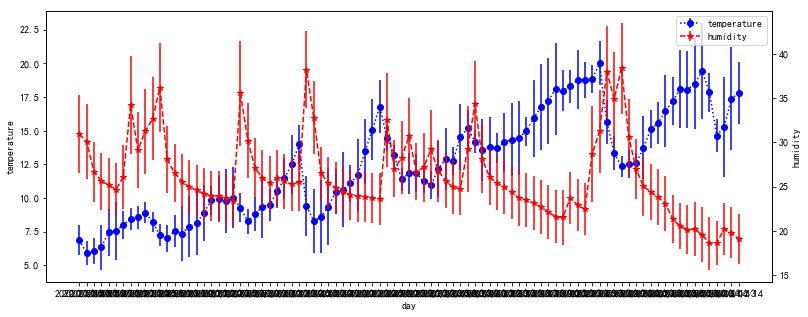

In [18]:
# fig = plt.figure()
fig =plt.figure(figsize=(13,5)) #图像大小
ax = fig.add_subplot(111)
# tempstd=df.groupby('day').std()['temperature']
# humstd=df.groupby('day').std()['humidity']
ax.errorbar(x, y, fmt="bo:", yerr=tempstd, label = 'temperature')
ax2 = ax.twinx()
ax2.errorbar(x,z,fmt="r*--", yerr=humstd/2, label = 'humidity')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.xticks(x,fontproperties = 'Times New Roman' ,rotation = 90) 
# grid( linestyle='-', linewidth=2)#color='r',
ax.set_xlabel("day")
ax.set_ylabel(r"temperature")
ax2.set_ylabel(r"humidity")
plt.savefig('error.svg',format='svg')
plt.show()

In [19]:
#13436

In [20]:
file=r'G:\Onedrive文件\OneDrive - whu.edu.cn\自然灾害知识图谱\apendfile\5个要素一起.csv'
#plt.annotate('应收尽收', xy=(x0, y0), xytext=(x0, y0 + 0.01))  # 添加注释
cf=pd.read_csv(file,encoding='GB18030',engine='python')

In [21]:
import scipy
import scipy.stats 
aa=cf['锘縞onfirm'].values
bb = cf['temperature'].values
print(scipy.stats.pearsonr(aa,bb))

aa=cf['recovery'].values
bb = cf['temperature'].values
pccs = scipy.stats.pearsonr(aa,bb)
print(pccs)

aa=cf['锘縞onfirm'].values
bb = cf['humidity'].values
pccs = scipy.stats.pearsonr(aa,bb)
print(pccs)

aa=cf['recovery'].values
bb = cf['humidity'].values
pccs = scipy.stats.pearsonr(aa,bb)
print(pccs)

(-0.3723953548813661, 0.0002780055285103512)
(0.182843388287033, 0.08278343713857897)
(0.10270574774622403, 0.33265928603015504)
(0.13301765949571545, 0.20876795877804294)


In [22]:
import numpy as np
import pandas as pd
#cf['锘縞onfirm']#recovery	death	temperature	humidity
aa=cf['锘縞onfirm'].values
bb = cf['temperature'].values
pccs = np.corrcoef(aa,bb)
print(pccs)

aa=cf['recovery'].values
bb = cf['temperature'].values
pccs = np.corrcoef(aa,bb)
print(pccs)

aa=cf['锘縞onfirm'].values
bb = cf['humidity'].values
pccs = np.corrcoef(aa,bb)
print(pccs)

aa=cf['recovery'].values
bb = cf['humidity'].values
pccs = np.corrcoef(aa,bb)
print(pccs)

[[ 1.         -0.37239535]
 [-0.37239535  1.        ]]
[[1.         0.18284339]
 [0.18284339 1.        ]]
[[1.         0.10270575]
 [0.10270575 1.        ]]
[[1.         0.13301766]
 [0.13301766 1.        ]]


In [29]:
cf.head()

,锘縞onfirm,City_CH,recovery,death,temperature,humidity
0,0,N_C_0115,4,0,6.855728,30.918779
1,1,N_C_0116,5,1,5.876204,30.068380
2,17,N_C_0117,1,0,6.070231,26.683056
3,59,N_C_0118,0,3,6.325899,25.602488
4,77,N_C_0119,0,3,7.433349,25.178716


In [31]:
cf.shape

(91, 6)

In [38]:
anovadf=pd.DataFrame({'confirm':cf['锘縞onfirm'].values,'humidity':cf['humidity'].values,'temperature':cf['temperature'].values})

In [39]:
anovadf.head()

,confirm,humidity,temperature
0,0,30.918779,6.855728
1,1,30.068380,5.876204
2,17,26.683056,6.070231
3,59,25.602488,6.325899
4,77,25.178716,7.433349


In [58]:
a=anovadf['humidity'].values.tolist()
print(a.sort(reverse = False))
len(a)
b=anovadf['temperature'].values.tolist()
print(b.sort(reverse = False))
len(b)

None
None


91

In [60]:
def relabel(num,typec):
    if typec=='b':
        if num in b[0:15]:
            return 'tem1'
        if num in b[15:30]:
            return 'tem2'
        if num in b[30:45]:
            return 'tem3'
        if num in b[45:60]:
            return 'tem4'
        if num in b[60:75]:
            return 'tem5'
        if num in b[75:]:
            return 'tem6'
    else:
        if num in a[0:15]:
            return 'hum1'
        if num in a[15:30]:
            return 'hum2'
        if num in a[30:45]:
            return 'hum3'
        if num in a[45:60]:
            return 'hum4'
        if num in a[60:75]:
            return 'hum5'
        if num in a[75:]:
            return 'hum6'

In [63]:
anovadf['humidity1']=anovadf.apply(lambda x: relabel(x['humidity'],'a'), axis=1)
anovadf['temperature1']=anovadf.apply(lambda x: relabel(x['temperature'],'b'), axis=1)

In [65]:
anovadf.to_csv('spss.csv')

In [66]:
#recory confim humidity temperature
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


model = ols('confirm~C(humidity1) + C(temperature1)+C(humidity1):C(temperature1)', anovadf).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(humidity1),5.0,6.534930e+06,1.306986e+06,4.522715,0.001382
C(temperature1),5.0,1.304637e+07,2.609275e+06,9.029175,0.000002
C(humidity1):C(temperature1),25.0,1.030236e+07,4.120942e+05,1.426017,0.129567
Residual,63.0,1.820590e+07,2.889826e+05,NaN,NaN


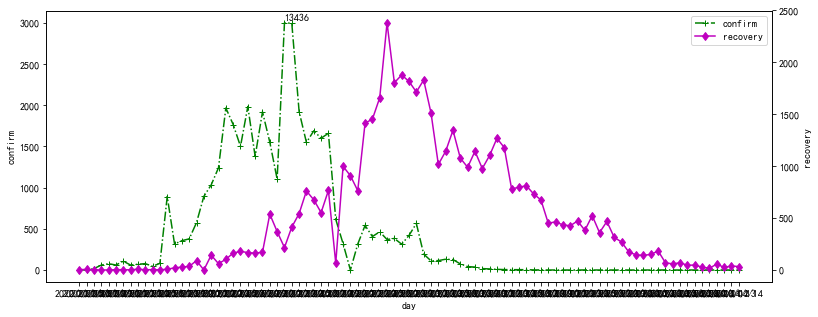

In [23]:
# fig = plt.figure()
#cf['锘縞onfirm'].values.tolist()
fig =plt.figure(figsize=(13,5)) #图像大小
ax = fig.add_subplot(111)
# tempstd=df.groupby('day').std()['temperature']
# humstd=df.groupby('day').std()['humidity']
# plt.xticks(x,fontproperties = 'Times New Roman' ,rotation = 90) 
ax.plot(x, pd.Series(cf['锘縞onfirm'].values.tolist()),"g+-.",label = 'confirm')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.annotate('13436', xy=(x[28], 3000), xytext=(x[28], 3000 +30))  # 添加注释

# ax.set_xticklabels(x[::7],rotation=40)    #显示日期  否则就是显示整数 以三天为一个间隔

ax2 = ax.twinx()
ax2.plot(x,pd.Series(cf['recovery'].values.tolist()),"md-",label = 'recovery')

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.xticks(x,fontproperties = 'Times New Roman' ,rotation = 90) 
# grid( linestyle='-', linewidth=2)#color='r',
ax.set_xlabel("day")
ax.set_ylabel(r"confirm")
ax2.set_ylabel(r"recovery")

plt.savefig('recover.svg',format='svg')
plt.show()

In [24]:
tf.mean().to_csv('研究期间的传感器信息.csv')

In [25]:
sensor=pd.read_csv('研究期间的传感器信息.csv',encoding='GB18030',engine='python')

In [26]:
import matplotlib.pyplot as plt

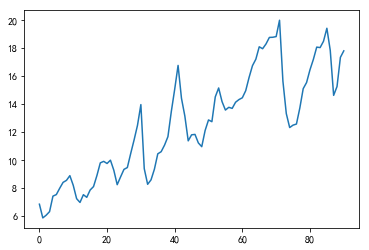

In [27]:
sensor['temperature'].plot()

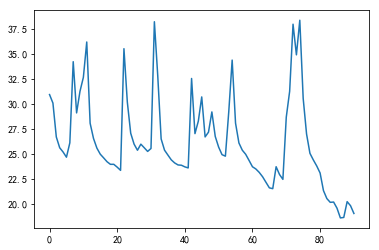

In [28]:
sensor['humidity'].plot()